In [206]:
import numpy as np
import matplotlib.pyplot as plt

In [207]:
from loaders import clean_text_for_pattern_letter
from temp_text import template_str
input_str = clean_text_for_pattern_letter(template_str, out_len=500)
print(len(input_str))
letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u',
               'v', 'w', 'x', 'y', 'z', ' ', '.', ',', '"', '\'', '1']
print(f'{letters=}')

len(letters)=32
500
letters=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ', '.', ',', '"', "'", '1']


In [208]:
prev_n = 10

StatsDict: dict[str, dict] = {}

for inp_idx, inp_ltr in enumerate(input_str):
    if inp_idx == 0:
        continue
    
    for rev_idx in range(prev_n):
        prev_idx = inp_idx - rev_idx - 1

        if prev_idx <= 0:
            break

        prev_ltr = input_str[prev_idx]
        
        prev_stats = StatsDict.setdefault(prev_ltr, {})
        stats = prev_stats.setdefault(rev_idx, {})
        stats.setdefault(inp_ltr, 0)
        
        stats[inp_ltr] += 1

In [209]:
for sdk, sdv in StatsDict.items():
    print(sdk)
    for sd_k, sd_v in sdv.items():
        print(sd_k, sd_v)
    print('')

h
0 {'e': 13, 'a': 3, 'o': 1, 'i': 3, 'r': 1, ' ': 1}
1 {' ': 9, 'n': 1, 'a': 2, 'u': 1, 's': 3, 'o': 1, 't': 4, 'r': 1}
2 {'s': 3, 'p': 1, 'c': 4, 'n': 1, 'r': 2, 'l': 1, ' ': 3, 'u': 1, 'h': 1, 'd': 1, '.': 1, 'e': 1, 'i': 1, 'f': 1}
3 {'k': 1, 'o': 3, 'e': 2, 'd': 2, 'h': 3, 'w': 1, 'g': 1, 'r': 1, ' ': 3, 'm': 1, 'u': 1, 'p': 1, 'c': 1, 'i': 1}
4 {'y': 1, 'r': 2, 'l': 3, ' ': 3, 'o': 3, 'e': 1, 'a': 4, 'h': 1, '"': 1, 'b': 1, 'f': 1, 't': 1}
5 {' ': 2, 't': 3, 'o': 4, '.': 1, 's': 2, 'u': 1, 'r': 2, 'y': 1, 'c': 1, 'w': 2, 'i': 1, 'a': 1, 'l': 1}
6 {'a': 1, ' ': 5, 'r': 4, 'o': 2, 'l': 1, 'e': 2, 't': 2, 'd': 1, '.': 1, 's': 3}
7 {'b': 1, 'w': 2, ' ': 5, '"': 1, 'm': 2, 'd': 3, 't': 2, 'h': 1, 'o': 2, "'": 1, 'i': 1, 'u': 1}
8 {'o': 2, 'a': 4, 'i': 1, 'e': 3, ' ': 2, 'h': 2, 'w': 2, 'f': 1, '"': 1, 's': 1, 'v': 1, 'b': 1}
9 {'v': 1, 's': 2, 'f': 1, 't': 1, 'o': 3, 'r': 3, 'h': 1, ' ': 4, 'd': 1, 'i': 1, 'e': 2, 'j': 1}

e
0 {' ': 17, 'l': 3, 'v': 3, 'd': 4, 'a': 3, 'o': 1, 'r': 4, 

In [210]:
TF = []
for inp_idx, inp in enumerate(input_str):

    stats = []
    for rev_idx in range(prev_n):
        let_idx = inp_idx - rev_idx
        if let_idx < 0:
            break

        st = StatsDict[input_str[let_idx]].get(rev_idx, {})
        stats.append(st)
    # print(inp)
    for st in stats:
        st_sum = sum(st.values())

        for key, val in st.items():
            st[key] = val / st_sum

        # print(input_str[inp_idx + 1], max(st, key=st.get), st)
        
    letter_stats = {}
    for letter in letters:
        letter_stats.setdefault(letter, 0)

        for st in stats:
            # if letter_stats[letter] == 0:
            #     letter_stats[letter] = st.get(letter, 0)
            # else:
            letter_stats[letter] += st.get(letter, 0)

    max_key = max(letter_stats, key=letter_stats.get)
    TF.append(letter_stats[max_key])
    
    if inp_idx + 1 < len(input_str):
        print(input_str[inp_idx + 1], max_key, letter_stats[max_key])
    else:
        print('>', max_key, letter_stats[max_key])
    print()



h h 0.37037037037037035

e e 0.8872053872053872

    1.178200444157891

s c 0.5173136675335015

k   0.93803715222944

y   0.8299805613104381

    1.8401278052774341

a   1.3290734154527746

b   1.9598429245808573

o   1.4305471872978215

v   1.7946978326735485

e e 2.2763097892401984

    2.4744174427958066

t   1.4663070294206342

h h 1.6054223522591864

e e 2.3485514002001544

    3.002655017299357

p   1.7271268645230542

o o 1.5118967432719264

r   1.166409365481178

t   1.6872096660689724

    1.8226018404328126

w   2.0609368328528412

a a 1.5658069666496632

s   1.5965984598007072

    2.7024178307161275

t   1.3532095687783656

h   1.6127953822317722

e e 1.793273740609732

    2.7782286394198668

c   1.5495964511932019

o   1.5411960739383113

l a 1.20386200703581

o   1.661924109331803

r   1.936216272595632

    2.5752502971663054

o   1.2011100011100013

f   1.4293621484632721

    2.2150318782341256

t   1.4902957368087162

e   1.9224630550473245

l   1.5827301009347385

e

500 2.7202277031354196 0.0


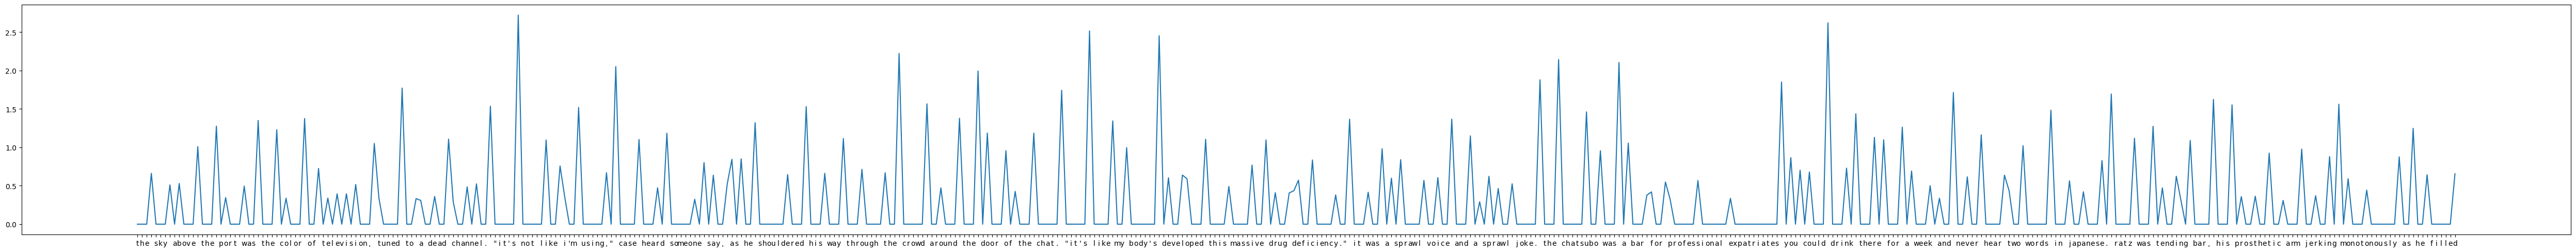

In [211]:
TF = np.array(TF)
TF = TF - np.pad(TF, (1, 0))[:-1]
# print(TF)
TF[np.where(TF > 0)] = 0
TF = np.abs(TF)
TF[np.where(TF <= np.mean(TF))] = 0
# TF[np.where(TF <= 0.5)] = 0
print(TF.size, TF.max(), TF.min())

fig, axs = plt.subplots(1, 1, figsize=(50, 5), tight_layout=True)
axs.plot(np.arange(TF.size), TF)
axs.xaxis.set_ticks(np.arange(len(input_str)) ,input_str)

plt.show()